In [1]:
%load_ext autoreload
%autoreload 2
import Function as ut

In [12]:
with open('Matrix_reference_and_query_reads_Nucleotides.pkl', 'rb') as f:
    matrice_of_quality = ut.pickle.load(f)

### Find matrix of percentage of match/mismatch of the nucleotide's quality at three interval

In [14]:
list_of_matrix = []

for x in [True,False]:#Forward/Reverse
    for y in [True, False, 'l']:#<20,>=20,all
        list_of_matrix.append(ut.matrix_of_error_single(matrice_of_quality,x,y))

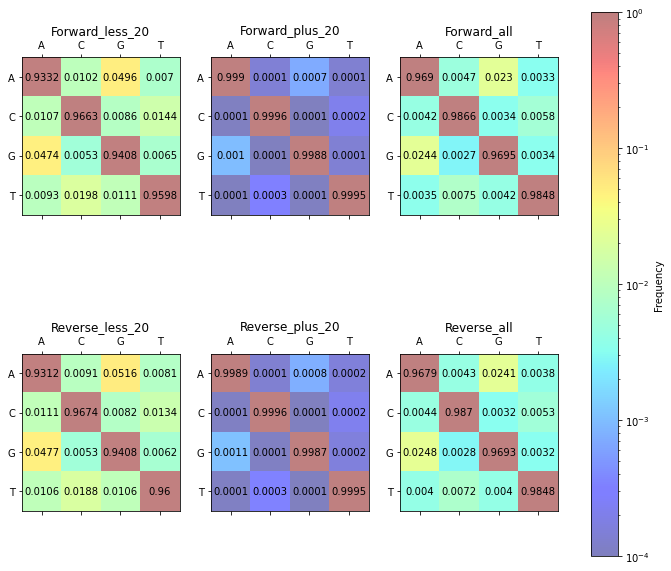

In [16]:
ut.plot_matrix_error(list_of_matrix)

### Find the frequency of error at each level of quality

In [17]:
error_of_percentage = {}
error_bar = {}
for x in ["A","C","G","T"]:
    lista_frequency, lista_errorbar = ut.percentage_error(x,matrice_of_quality,True)
    error_of_percentage[x] = lista_frequency
    error_bar[x] = lista_errorbar

/home/dario/miniconda3/envs/bac/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/dario/miniconda3/envs/bac/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


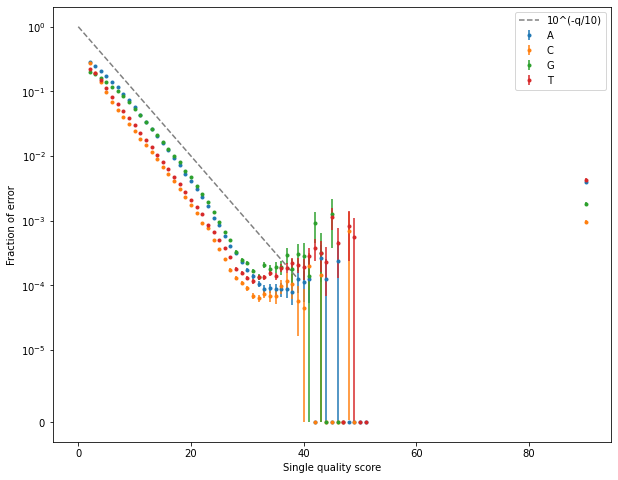

In [19]:
ut.plot_error_rate_pro_quality(error_of_percentage,error_bar)

In [18]:
error_of_percentage_reverse = {}
error_bar_reverse = {}
for x in ["A","C","G","T"]:
    lista_frequency_reverse, lista_errorbar_reverse = ut.percentage_error(x,matrice_of_quality,False)
    error_of_percentage_reverse[x] = lista_frequency_reverse
    error_bar_reverse[x] = lista_errorbar_reverse

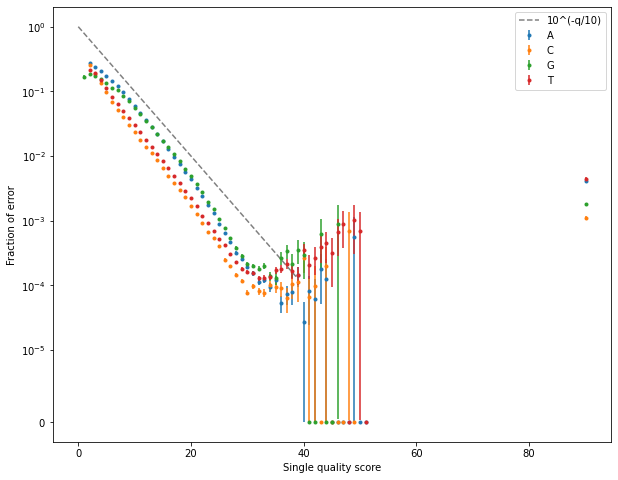

In [21]:
ut.plot_error_rate_pro_quality(error_of_percentage_reverse,error_bar_reverse)

## Triple Sequence Nucleotide

### Find matrix of percentage of match/mismatch of the nucleotide's quality at three interval

In [22]:
matrice_of_quality_triplet = ut.read_quality_seq_triplet('reads.sorted.bam','assembled_genome/assembly.fsa')

In [23]:
# Find all the possibile sequence with three nucleotidies
possibilities = []
for x in ["A","T","C","G"]:
    for y in ["A","T","C","G"]:
        for z in ["A","T","C","G"]:
            possibilities.append(y+x+z)

In [25]:
risultato = ut.matrix_of_error_triplet(matrice_of_quality_triplet,True,'l')

<Figure size 720x576 with 0 Axes>

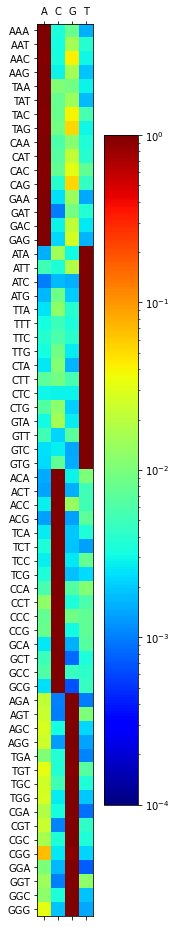

In [26]:
ut.plot_of_error_matrix_triplet(risultato,possibilities)

### Distribution of error in triplet

In [44]:
percentage_of_error_triplet = ut.percentage_error_triplet(matrice_of_quality_triplet,True,possibilities)

In [45]:
single_possibilities = ['A','C','G','T']
percentage_of_error_single = ut.percentage_error_single(matrice_of_quality,True,single_possibilities)

In [62]:
ratio = {}
for x in possibilities:
    ratio[x] = ut.np.log10(percentage_of_error_triplet[x]/percentage_of_error_single[x[1]])

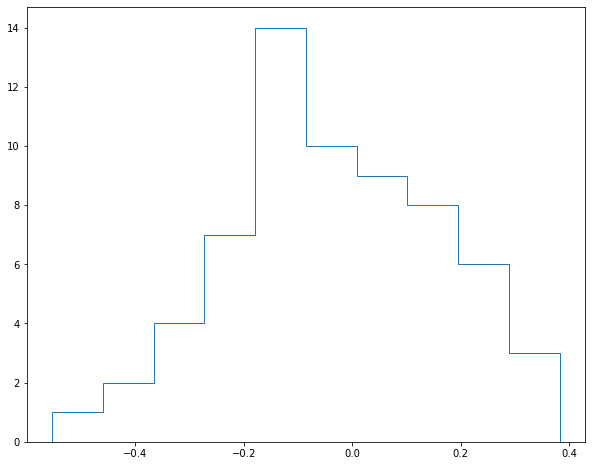

In [51]:
ut.plt.figure(figsize=(10,8))
ut.plt.hist(ratio.values(),bins=10,histtype='step')
ut.plt.show()

## Quintuple Sequence Nucleotide

### Distribution of error in quintuple

In [56]:
matrice_of_quality_quintuple = ut.read_quality_seq_quintuple('reads.sorted.bam','assembled_genome/assembly.fsa')

In [59]:
possibilities_quintuple = []
for x in ["A","T","C","G"]:
    for y in ["A","T","C","G"]:
        for z in ["A","T","C","G"]:
            for i in ["A","C","G","T"]:
                for j in ["A","C","G","T"]:
                        possibilities_quintuple.append(y+z+x+i+j)

In [63]:
percentage_of_error_quintuple = ut.percentage_error_quintuple(matrice_of_quality_quintuple,True,possibilities_quintuple)

In [66]:
ratio_quintuple = {}
for x in possibilities_quintuple:
    ratio_quintuple[x] = ut.np.log10(percentage_of_error_quintuple[x]/percentage_of_error_single[x[2]])

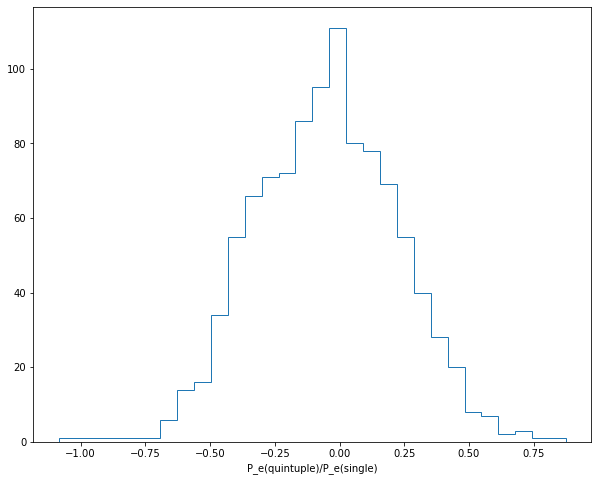

In [67]:
ut.plt.figure(figsize=(10,8))
ut.plt.hist(list(ratio_quintuple.values()),bins=30,histtype='step')
ut.plt.xlabel('P_e(quintuple)/P_e(single)')
#plt.plot(ratio_of_error['GGATC'],'o')
ut.plt.show()

In [68]:
# tails sequence
ratio_quintuple['GGATC'],ratio_quintuple['CCTGG'],ratio_quintuple['TCGGG']

(-1.084448013243212, 0.760340627931669, 0.8742322620449363)

In [72]:
# GGATC
errori = ut.somma_of_quality_quintuple('GGATC',matrice_of_quality_quintuple,True)
errori_tot = ut.somma_tot('GGATC',matrice_of_quality_quintuple,True)
print(errori,errori_tot)
ut.binom_test(errori,errori_tot,p=percentage_of_error_single['A'])

286 112114


1.5e-323

In [73]:
# CCTGG
errori_other = ut.somma_of_quality_quintuple('CCTGG',matrice_of_quality_quintuple,True)
errori_tot_other = ut.somma_tot('CCTGG',matrice_of_quality_quintuple,True)
print(errori_other,errori_tot_other)
ut.binom_test(errori_other,errori_tot_other,p=percentage_of_error_single['T'])

13380 152944


0.0

In [74]:
# TCGGG
errori_new = ut.somma_of_quality_quintuple('TCGGG',matrice_of_quality_quintuple,True)
errori_tot_new = ut.somma_tot('TCGGG',matrice_of_quality_quintuple,True)
print(errori_new,errori_tot_new)
ut.binom_test(errori_new,errori_tot_new,p=percentage_of_error_single['G'])

16313 71494


0.0